In [1]:
import ptc_twiss.madx_configuration as twiss_configuration
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_track.madx_configuration as track_configuration
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import visualization.optics_parameter_visualisation as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_nominal"
script_file_name = "ptc_twiss_script.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [4]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_configuration.TwissConfiguration(path_to_script, s)

In [5]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [37]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 110

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [7]:
title_sufix = "2017 nominal"
transporter1 = "twiss; madx 5.05.02"
transporter2 = "track; madx 5.05.02"

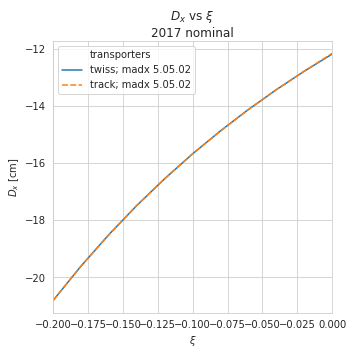

In [8]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_x, twiss_configuration),
    transporter2: (track_optics_parameters.compute_d_x, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "D x", title_sufix)

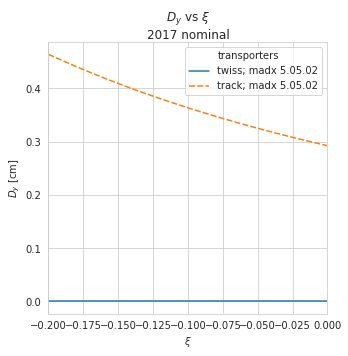

In [9]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_y, twiss_configuration),
    transporter2: (track_optics_parameters.compute_d_y, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "D y", title_sufix)

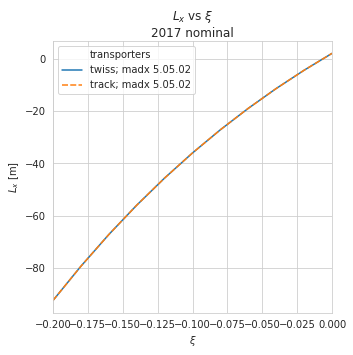

In [10]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_x, twiss_configuration),
    transporter2: (track_optics_parameters.compute_l_x, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "L x", title_sufix)

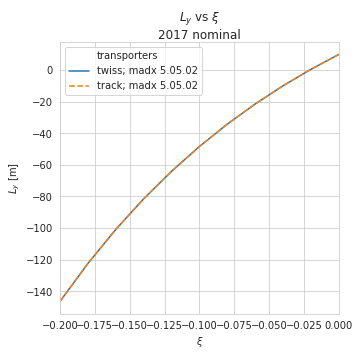

In [11]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_y, twiss_configuration),
    transporter2: (track_optics_parameters.compute_l_y, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "L y", title_sufix)

In [38]:
import ptc_track.transport_using_optical_functions as transport_function
import importlib
importlib.reload(transport_function)

<module 'ptc_track.transport_using_optical_functions' from '/home/rafalmucha/Pobrane/optic/optics_generator_python/src/ptc_track/transport_using_optical_functions.py'>

In [39]:
segments_by_function = transport_function.transport(track_configuration, bunch_configuration)

In [40]:
import ptc_track.particles_trajectory_generator as ptg
segments_by_track = ptg.generate_from_range(track_configuration, bunch_configuration)

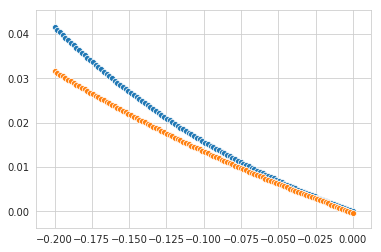

In [41]:
sns.scatterplot(x = segments_by_function["end"].T[2], y=segments_by_function["end"].T[0])
sns.scatterplot(x = segments_by_track["end"].T[7], y=segments_by_track["end"].T[2])

In [42]:
segments_by_function["end"]

array([[ 4.16217630e-02, -9.27038400e-04, -2.00000000e-01],
       [ 4.10057481e-02, -9.14179178e-04, -1.98165138e-01],
       [ 4.04124413e-02, -9.01431120e-04, -1.96330275e-01],
       [ 3.98073149e-02, -8.88793079e-04, -1.94495413e-01],
       [ 3.92192542e-02, -8.76263821e-04, -1.92660550e-01],
       [ 3.86510256e-02, -8.63842224e-04, -1.90825688e-01],
       [ 3.80549063e-02, -8.51527364e-04, -1.88990826e-01],
       [ 3.74836918e-02, -8.39318042e-04, -1.87155963e-01],
       [ 3.69101136e-02, -8.27213165e-04, -1.85321101e-01],
       [ 3.63440862e-02, -8.15211743e-04, -1.83486239e-01],
       [ 3.58064526e-02, -8.03312794e-04, -1.81651376e-01],
       [ 3.52338159e-02, -7.91515161e-04, -1.79816514e-01],
       [ 3.46973129e-02, -7.79817795e-04, -1.77981651e-01],
       [ 3.41520176e-02, -7.68219831e-04, -1.76146789e-01],
       [ 3.36173798e-02, -7.56720234e-04, -1.74311927e-01],
       [ 3.30945921e-02, -7.45317894e-04, -1.72477064e-01],
       [ 3.25713636e-02, -7.34011971e-04

In [44]:
x_error = segments_by_function["end"].T[0] - segments_by_track["end"].T[2]

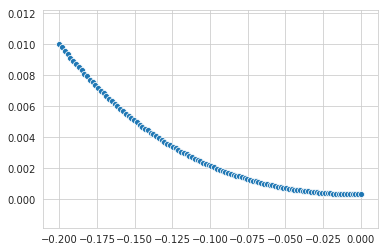

In [45]:
sns.scatterplot(x = segments_by_track["end"].T[7], y=x_error)

In [46]:
x_error_relative = x_error / segments_by_track["end"].T[2]

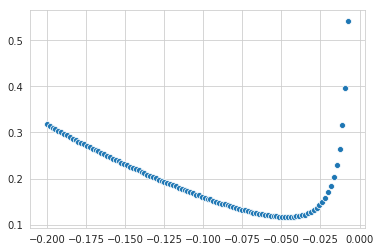

In [48]:
sns.scatterplot(x = segments_by_track["end"].T[7][:-4], y=x_error_relative[:-4])